In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Reading and displaying the dataset
dataset = pd.read_csv('iris.data',delimiter = ',',names=['sepal length', 'sepal width', \
                                                       'petal length', "petal width",
                                                      'Species'])
dataset.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


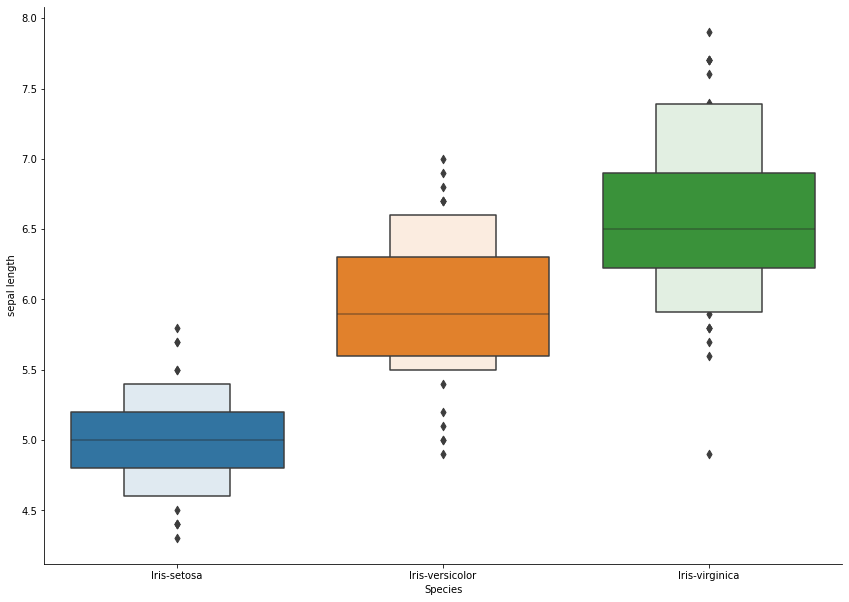

In [7]:
sns.catplot(x="Species", y="sepal length", kind="boxen", data=dataset, height=8.27, aspect=11.7/8.27)

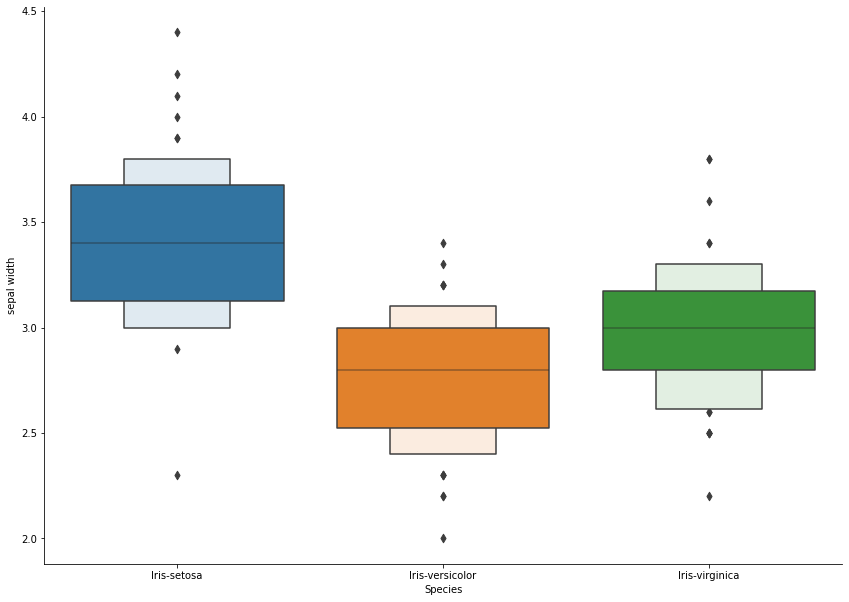

In [8]:
sns.catplot(x="Species", y="sepal width", kind="boxen", data=dataset, height=8.27, aspect=11.7/8.27);

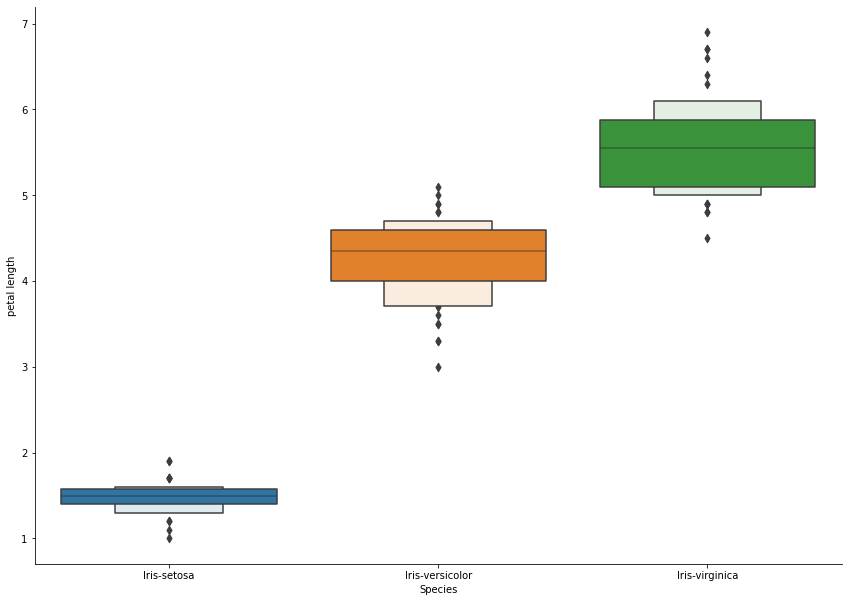

In [9]:
sns.catplot(x="Species", y="petal length", kind="boxen", data=dataset, height=8.27, aspect=11.7/8.27);

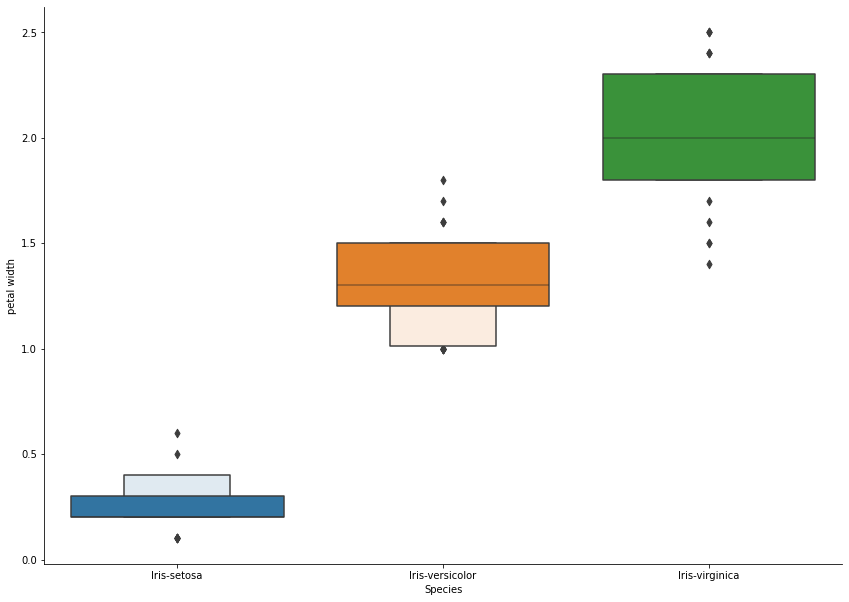

In [10]:
sns.catplot(x="Species", y="petal width", kind="boxen", data=dataset, height=8.27, aspect=11.7/8.27);

In [18]:
#Checking for missing values
dataset.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Species         0
dtype: int64

In [19]:
x = dataset.drop(['Species'],axis = 1)
y = dataset['Species']

In [21]:
#Encoding Classes
from sklearn.preprocessing import LabelEncoder
dataset['Species'] = LabelEncoder().fit_transform(dataset['Species'])

In [22]:
dataset['Species'].unique()

array([0, 1, 2])

In [23]:
#Splitting the training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
#Feed the training data to the model
regressor.fit(x_train,y_train)

LogisticRegression()

In [28]:
#Predicting the Species for Test dataset
y_predict = regressor.predict(x_test)
print("Predicted Values:",y_predict)
print("Actual Values:",y_test.values)

Predicted Values: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
Actual Values: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 

In [31]:
from sklearn import metrics
print("Prediction Accuracy : ", metrics.accuracy_score(y_test, y_predict))

#Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_predict})

error_df

Prediction Accuracy :  1.0

Actual vs Predicted Salaries 




,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [33]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_predict)
accuracy = cm.diagonal().sum()/cm.sum()
print("Accuracy of Predictions = ",accuracy)
print(classification_report(y_test, y_predict))

Accuracy of Predictions =  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

